<a href="https://colab.research.google.com/github/Sakshi3071/Sakshi_Satre_INBT02267_JULY23-Data-Scienece-Internship/blob/main/iNeuBytes_Microasessment_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2 : Implement a Machine Learning Model for Regression Problem**

In [ ]:
#importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
air_pol = pd.read_csv("/content/PRSA_data_2010.1.1-2014.12.31.csv")

In [ ]:
air_pol.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
print("Shape of Data :",air_pol.shape)

Shape of Data : (43824, 13)


In [ ]:
air_pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB




---

# **Step 1: Data Preprocessing**

---


In [ ]:
air_pol.isnull().sum() #checking null Values

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [ ]:
air_pol.dropna(inplace=True)

In [ ]:
air_pol.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [ ]:
air_pol.drop(columns = ['No'],inplace=True)

In [ ]:
air_pol.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
       'Iws', 'Is', 'Ir'],
      dtype='object')

In [ ]:
#Handling Time series data
air_pol['timestamp'] = pd.to_datetime(air_pol[['year', 'month', 'day', 'hour']])
air_pol.set_index('timestamp', inplace=True)

In [ ]:
# Drop the individual 'year', 'month', 'day', and 'hour' columns
air_pol.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

In [ ]:
air_pol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41757 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm2.5   41757 non-null  float64
 1   DEWP    41757 non-null  int64  
 2   TEMP    41757 non-null  float64
 3   PRES    41757 non-null  float64
 4   cbwd    41757 non-null  object 
 5   Iws     41757 non-null  float64
 6   Is      41757 non-null  int64  
 7   Ir      41757 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.9+ MB


In [ ]:
air_pol['cbwd'].value_counts()

SE    14573
NW    13484
cv     8944
NE     4756
Name: cbwd, dtype: int64

In [ ]:
# Encoding Labels
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

air_pol['cbwd'] = lb.fit_transform(air_pol['cbwd'])
air_pol.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler



---

# **Step 2 : Exploratory Data Analysis(EDA)**

---



In [ ]:
air_pol.describe()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,98.613215,1.750174,12.401561,1016.442896,1.663482,23.866747,0.055344,0.194866
std,92.050387,14.433658,12.175215,10.300733,0.937802,49.617495,0.778875,1.418165
min,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,2.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,2.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,3.000000,565.490000,27.000000,36.000000


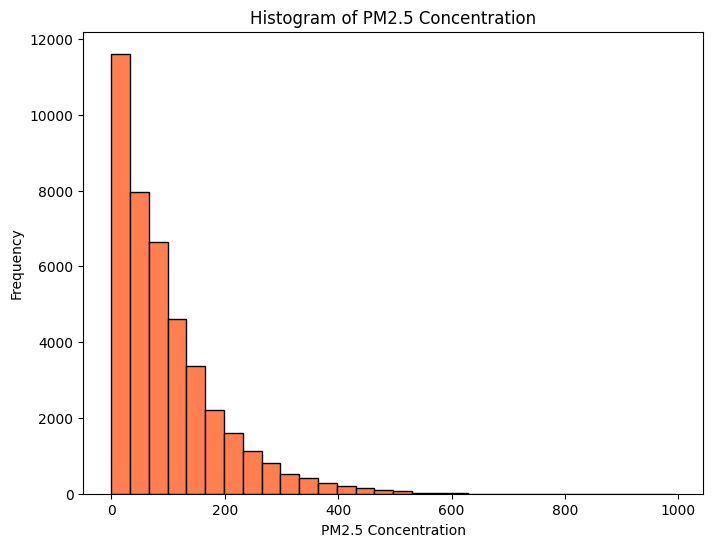

In [ ]:
import scipy.stats as stats

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(air_pol['pm2.5'], bins=30,color ='coral' ,edgecolor='black')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.title('Histogram of PM2.5 Concentration')
plt.show();

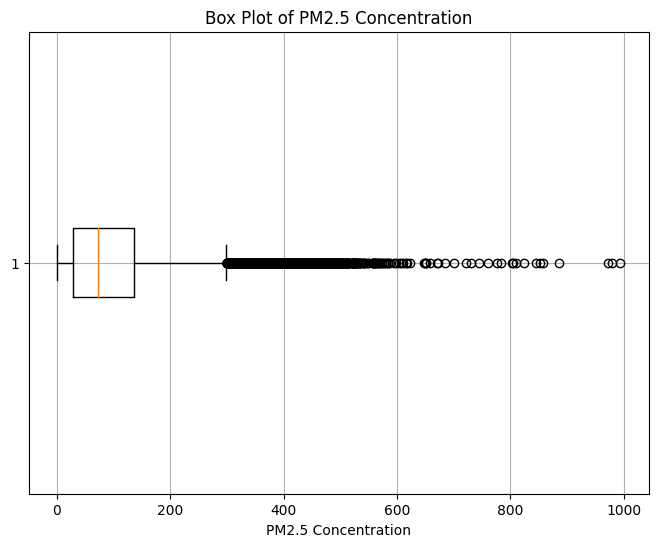

In [ ]:
# Box plot to identify potential outliers in PM2.5 concentrations
plt.figure(figsize=(8, 6))
plt.boxplot(air_pol['pm2.5'], vert=False)
plt.xlabel('PM2.5 Concentration')
plt.title('Box Plot of PM2.5 Concentration')
plt.grid(True)
plt.show();

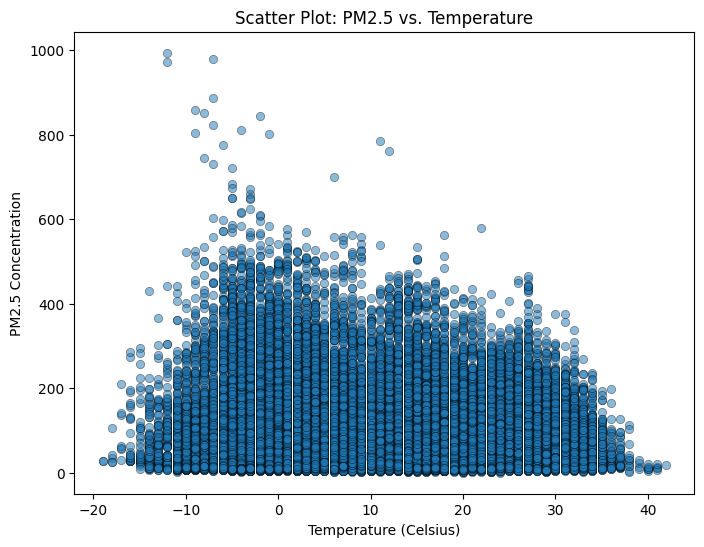

In [ ]:
# Scatter plot to explore the relationship between PM2.5 and Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x = air_pol['TEMP'],y = air_pol['pm2.5'], alpha=0.5,edgecolor = 'black')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('PM2.5 Concentration')
plt.title('Scatter Plot: PM2.5 vs. Temperature')

plt.show();

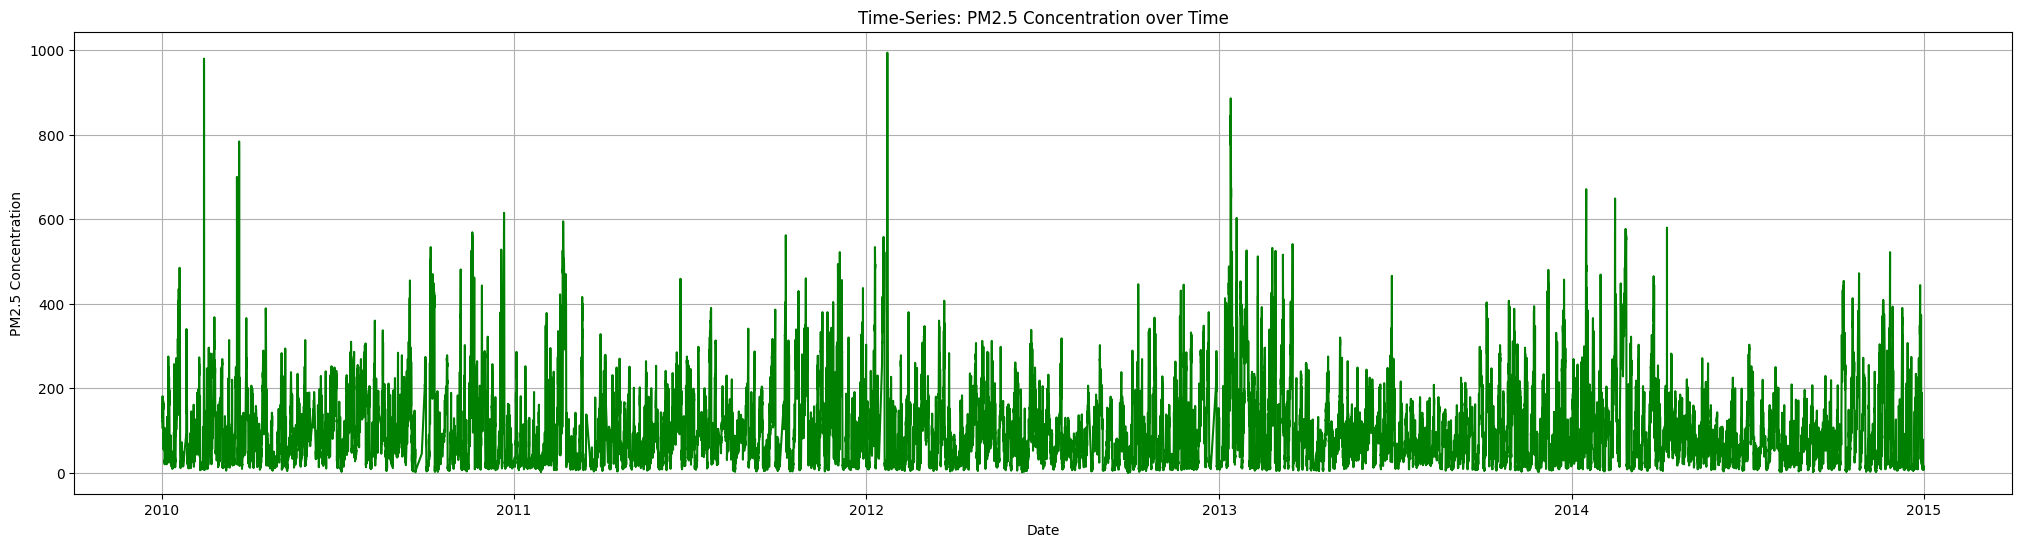

In [ ]:
# Time-series line plot to visualize trends in PM2.5 concentrations over time
plt.figure(figsize=(25, 6))
plt.plot(air_pol['pm2.5'], color='green')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Time-Series: PM2.5 Concentration over Time')
plt.grid(True)
plt.show()

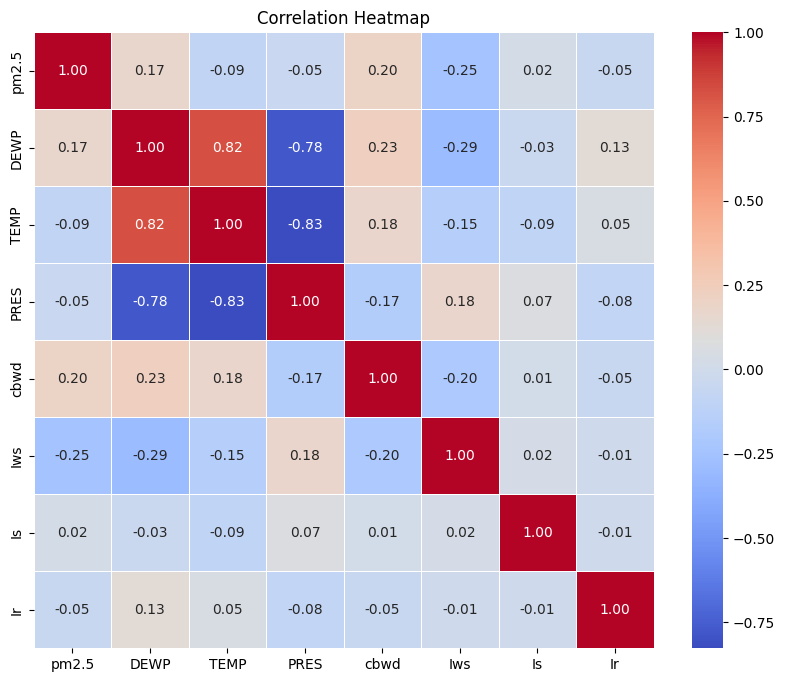

In [ ]:
# Calculate the correlation matrix
correlation_matrix = air_pol.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

In [ ]:
# Print correlation values of 'pm2.5' with other variables
print("Correlation of 'pm2.5' with other variables:")
print(correlation_matrix['pm2.5'].sort_values(ascending=False))

Correlation of 'pm2.5' with other variables:
pm2.5    1.000000
cbwd     0.197150
DEWP     0.171423
Is       0.019266
PRES    -0.047282
Ir      -0.051369
TEMP    -0.090534
Iws     -0.247784
Name: pm2.5, dtype: float64


In [ ]:
# Group data by day and calculate mean, median, and max PM2.5 levels for each day
daily_pm25_stats = air_pol['pm2.5'].resample('D').agg(['mean', 'median', 'max'])

# Print the aggregated statistics
print("\nDaily PM2.5 Statistics:")
print(daily_pm25_stats)


Daily PM2.5 Statistics:
                  mean  median    max
timestamp                            
2010-01-02  145.958333   150.5  181.0
2010-01-03   78.833333    80.0  107.0
2010-01-04   31.333333    28.5   79.0
2010-01-05   42.458333    33.5  106.0
2010-01-06   56.416667    48.5  132.0
...                ...     ...    ...
2014-12-27  238.666667   212.0  363.0
2014-12-28  197.375000   167.5  444.0
2014-12-29  159.000000   133.0  373.0
2014-12-30   46.083333    31.5  189.0
2014-12-31   10.041667     9.0   20.0

[1825 rows x 3 columns]


In [ ]:
# Group data by month and calculate mean, median, and max PM2.5 levels for each month
monthly_pm25_stats = air_pol['pm2.5'].resample('M').agg(['mean', 'median', 'max'])


print("\nMonthly PM2.5 Statistics:")
print(monthly_pm25_stats)


Monthly PM2.5 Statistics:
                  mean  median    max
timestamp                            
2010-01-31   90.442573    49.0  485.0
2010-02-28   97.233979    77.0  980.0
2010-03-31   94.100141    69.0  784.0
2010-04-30   80.029248    53.0  389.0
2010-05-31   86.899593    74.0  314.0
2010-06-30  109.003540   100.0  252.0
2010-07-31  123.647849   115.0  310.0
2010-08-31   97.602071    83.0  360.0
2010-09-30  122.510684   106.5  455.0
2010-10-31  118.982480    73.0  534.0
2010-11-30  138.120482    94.0  569.0
2010-12-31   97.333333    42.0  615.0
2011-01-31   44.891369    24.0  286.0
2011-02-28  150.321429    94.0  595.0
2011-03-31   57.918400    25.0  416.0
2011-04-30   91.585821    82.0  279.0
2011-05-31   65.321629    52.0  264.0
2011-06-30  108.466948    96.0  459.0
2011-07-31  107.572200    87.0  390.0
2011-08-31  103.424561   100.0  341.0
2011-09-30   95.272601    61.0  386.0
2011-10-31  145.225649   110.0  562.0
2011-11-30  109.632168    87.0  404.0
2011-12-31  108.519515 

In [ ]:
# Group data by year and calculate mean, median, and max PM2.5 levels for each year
yearly_pm25_stats = air_pol['pm2.5'].resample('Y').agg(['mean', 'median', 'max'])

print("\nYearly PM2.5 Statistics:")
print(yearly_pm25_stats)


Yearly PM2.5 Statistics:
                  mean  median    max
timestamp                            
2010-12-31  104.045730    79.0  980.0
2011-12-31   99.071340    71.0  595.0
2012-12-31   90.545871    69.0  994.0
2013-12-31  101.712376    71.5  886.0
2014-12-31   97.734557    72.0  671.0


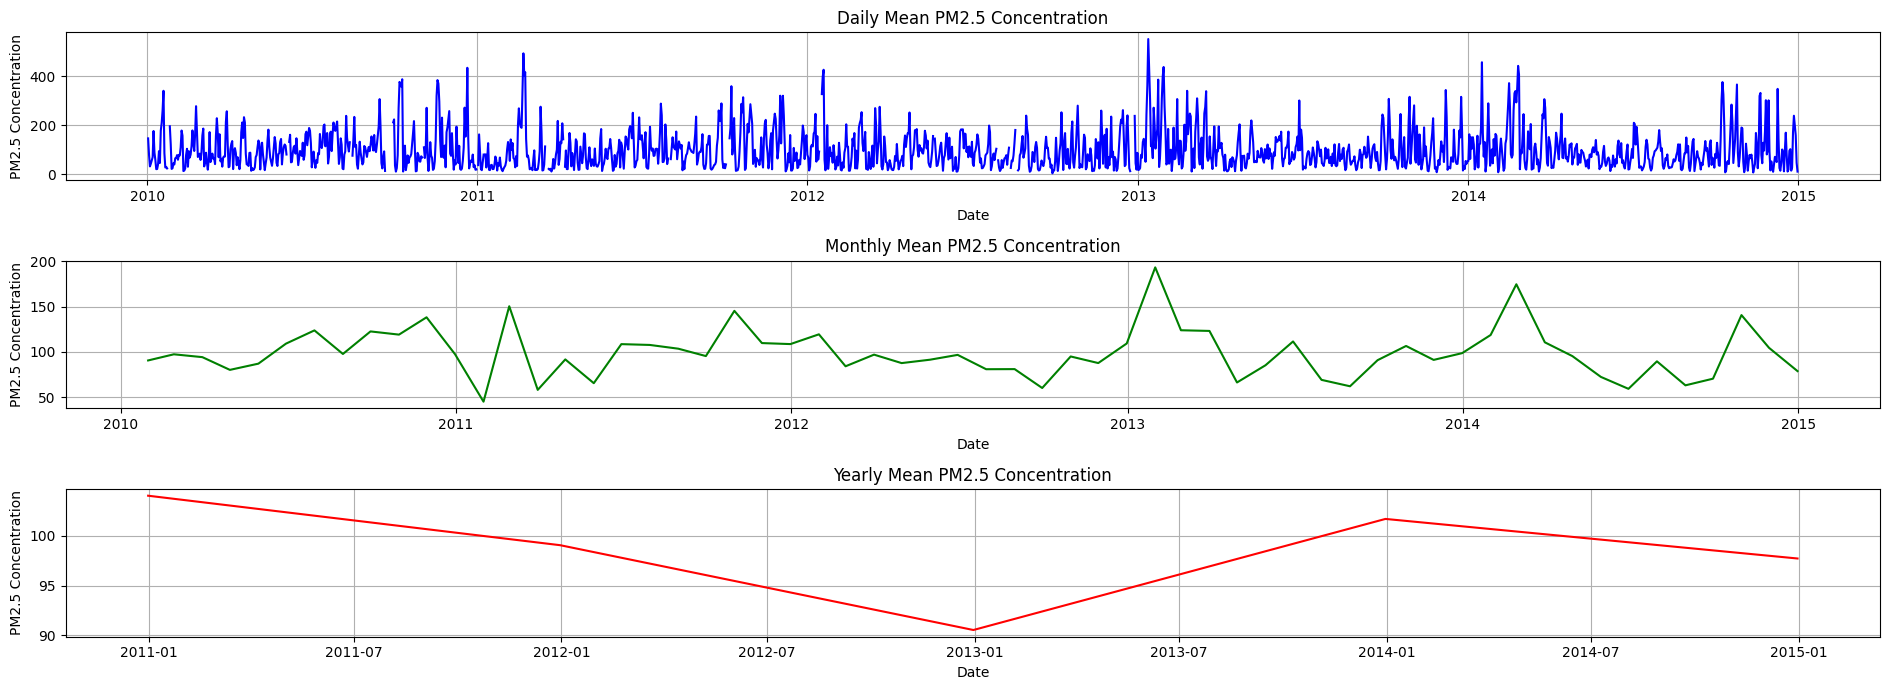

In [ ]:
# Group data by day and calculate mean PM2.5 levels for each day
daily_pm25_mean = air_pol['pm2.5'].resample('D').mean()

# Group data by month and calculate mean PM2.5 levels for each month
monthly_pm25_mean = air_pol['pm2.5'].resample('M').mean()

# Group data by year and calculate mean PM2.5 levels for each year
yearly_pm25_mean = air_pol['pm2.5'].resample('Y').mean()


# Plotting separate line plots for each time period
plt.figure(figsize=(19, 7))

# Daily line plot
plt.subplot(3, 1, 1)
plt.plot(daily_pm25_mean, color='blue')
plt.title('Daily Mean PM2.5 Concentration')
plt.ylabel('PM2.5 Concentration')
plt.xlabel('Date')
plt.grid(True)

# Monthly line plot
plt.subplot(3, 1, 2)
plt.plot(monthly_pm25_mean, color='green')
plt.title('Monthly Mean PM2.5 Concentration')
plt.ylabel('PM2.5 Concentration')
plt.xlabel('Date')
plt.grid(True)

# Yearly line plot
plt.subplot(3, 1, 3)
plt.plot(yearly_pm25_mean, color='red')
plt.title('Yearly Mean PM2.5 Concentration')
plt.ylabel('PM2.5 Concentration')
plt.xlabel('Date')
plt.grid(True)

plt.tight_layout()
plt.show();

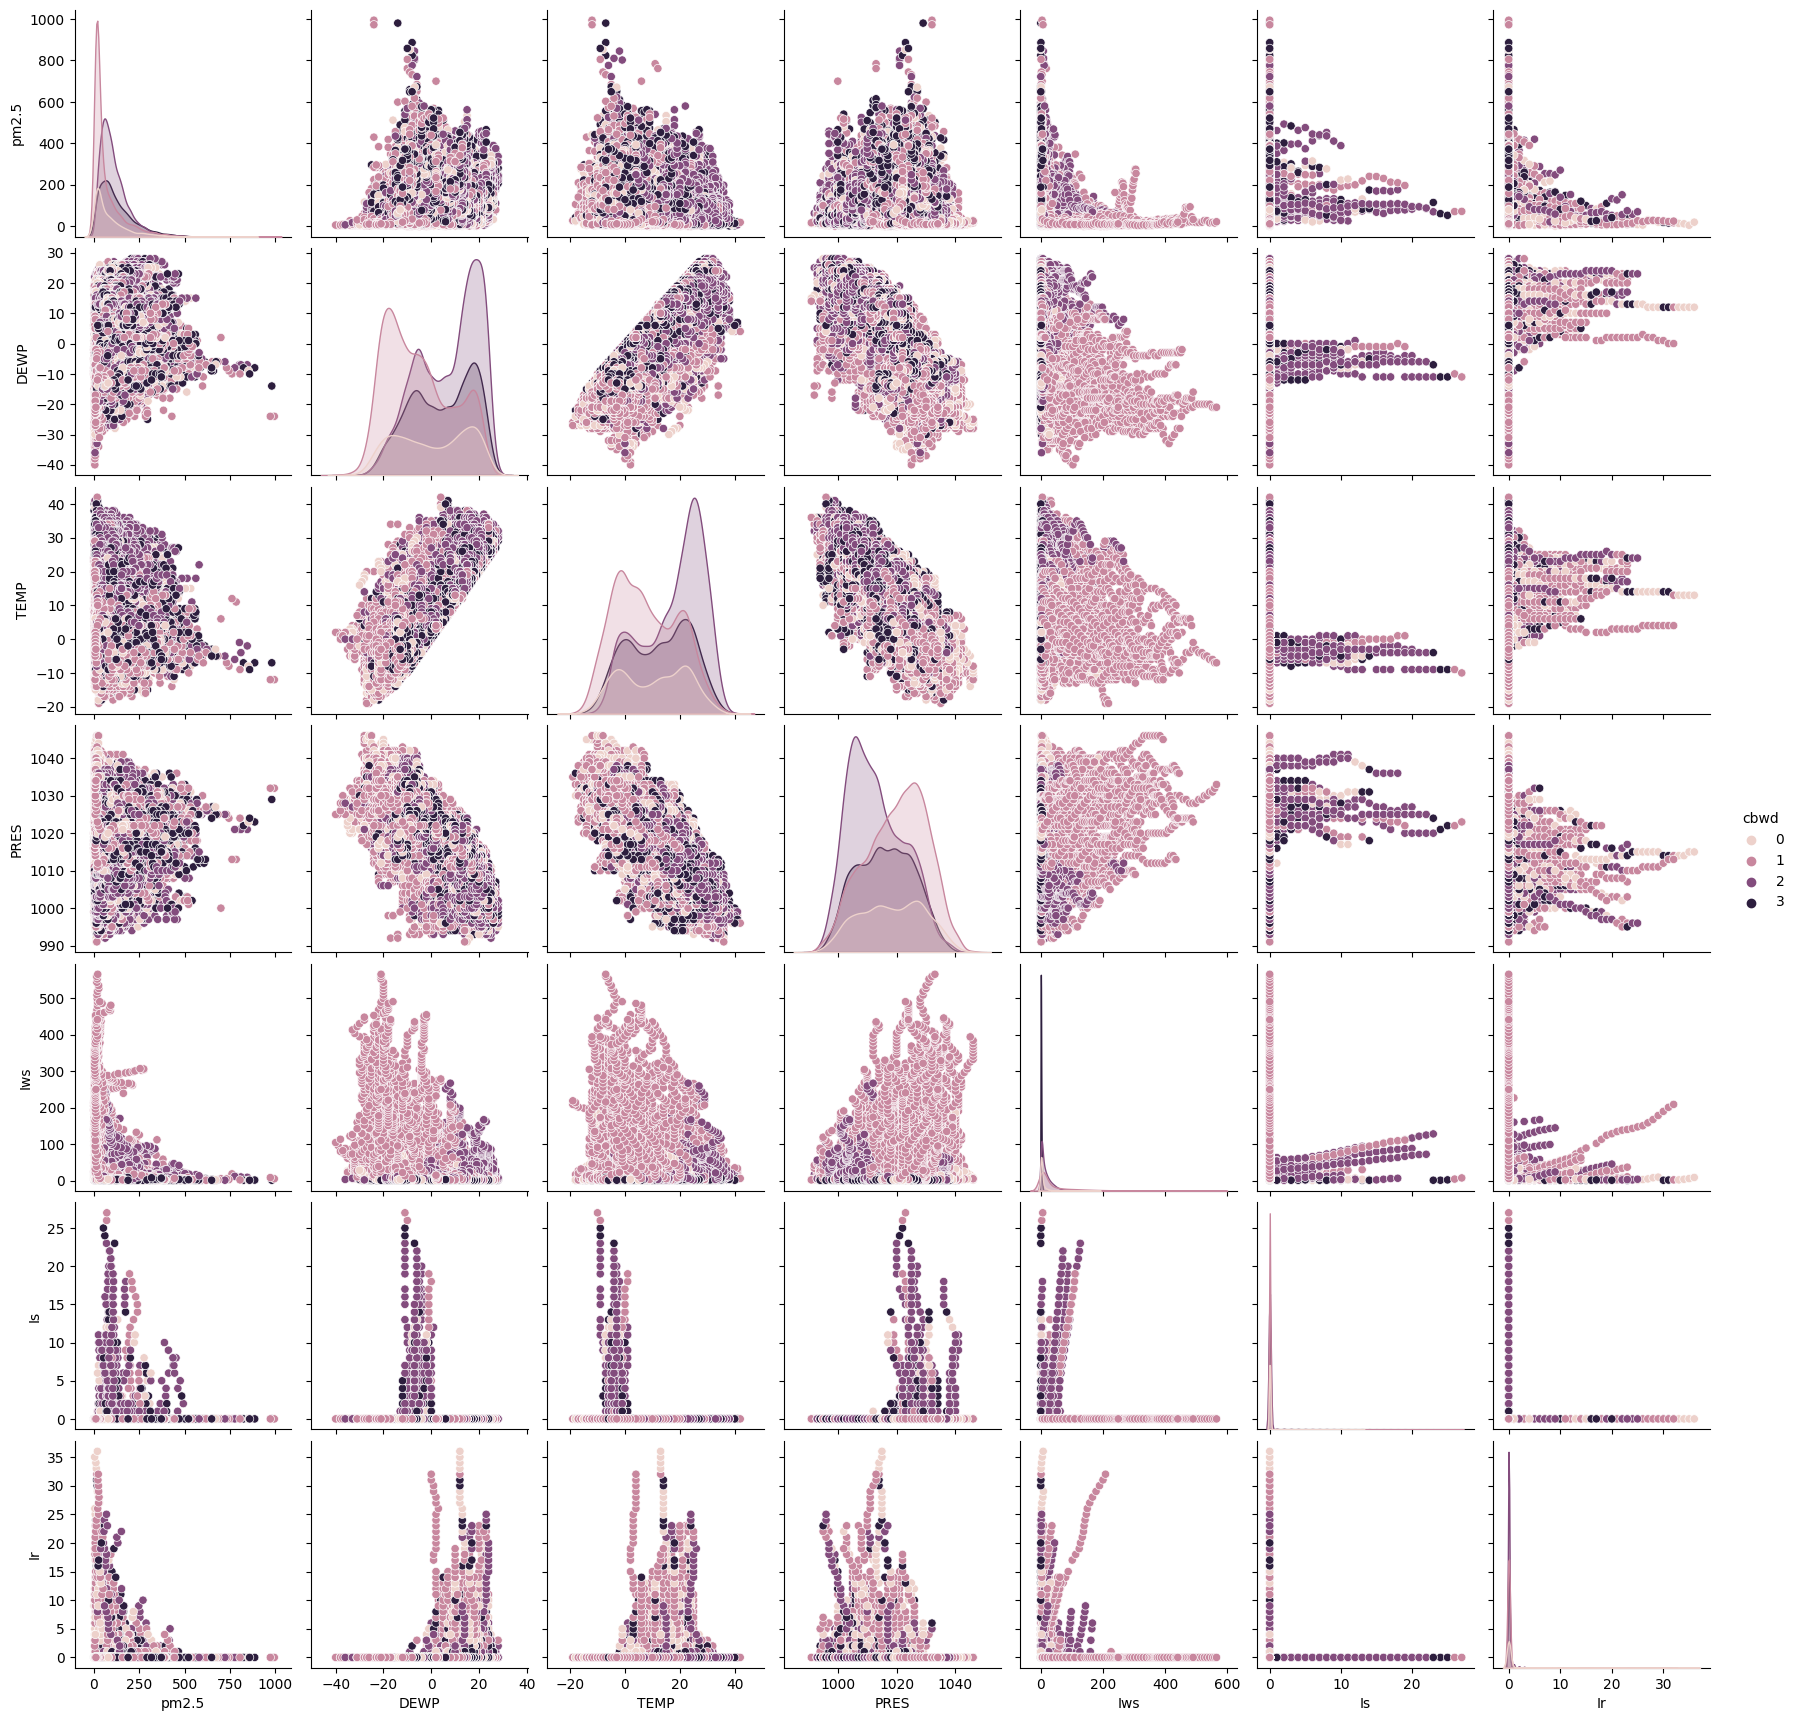

In [ ]:
# Create the pairplot for each class
subset_features =['pm2.5', 'DEWP', 'TEMP', 'PRES','Iws', 'Is', 'Ir']
sns.pairplot(air_pol, vars=subset_features, diag_kind='kde',hue = 'cbwd')





---

# **Step 4 : Model Implementation**

---





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
#feature selection
X = air_pol.drop(columns = ['pm2.5'])
y = air_pol['pm2.5']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



---



---

Ridge Regressor

---



---



In [ ]:
# Ridge Regressor
ridge_model = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10]}  # List of alpha values to try

ridge_grid = GridSearchCV(ridge_model, param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best Ridge model
best_ridge_model = ridge_grid.best_estimator_

In [ ]:
# Predictions on the test set
ridge_predictions = best_ridge_model.predict(X_test)



---

Model Eavluation :

---



In [ ]:
# Make predictions on training and testing data
ridge_train_predictions = best_ridge_model.predict(X_train)
ridge_test_predictions = best_ridge_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics for Ridge model
ridge_mae_train = mean_absolute_error(y_train, ridge_train_predictions)
ridge_mae_test = mean_absolute_error(y_test, ridge_test_predictions)

ridge_mse_train = mean_squared_error(y_train, ridge_train_predictions)
ridge_mse_test = mean_squared_error(y_test, ridge_test_predictions)

ridge_rmse_train = np.sqrt(ridge_mse_train)
ridge_rmse_test = np.sqrt(ridge_mse_test)

In [ ]:
# Print the evaluation metrics
print("Ridge Regressor - MAE (Train/Test):", ridge_mae_train, "/", ridge_mae_test)
print("Ridge Regressor - MSE (Train/Test):", ridge_mse_train, "/", ridge_mse_test)
print("Ridge Regressor - RMSE (Train/Test):", ridge_rmse_train, "/", ridge_rmse_test)

Ridge Regressor - MAE (Train/Test): 57.592572073953576 / 57.7030242651433
Ridge Regressor - MSE (Train/Test): 6278.492225065509 / 6531.666747866103
Ridge Regressor - RMSE (Train/Test): 79.23693725192506 / 80.8187277050691




---

Cross Validation & Overfitting Check :

---



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# 10-fold cross-validation for Ridge Regressor
ridge_cv_scores = cross_val_score(best_ridge_model, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_cv_rmse_scores = np.sqrt(-ridge_cv_scores)

In [ ]:
# Calculate the average cross-validation RMSE scores
ridge_cv_rmse_mean = ridge_cv_rmse_scores.mean()

In [ ]:
# Print the average cross-validation RMSE scores
print("Ridge Regressor - Average Cross-Validation RMSE:", ridge_cv_rmse_mean)

Ridge Regressor - Average Cross-Validation RMSE: 79.65868611809668





---


---

Random Forest Regressor

---



---


In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

rf_grid = GridSearchCV(rf_model, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best Random Forest model
best_rf_model = rf_grid.best_estimator_



---

Model Evaluation :

---


In [ ]:
# Make predictions on training and testing data
rf_train_predictions = best_rf_model.predict(X_train)
rf_test_predictions = best_rf_model.predict(X_test)


In [ ]:
# Calculate evaluation metrics for Random Forest model
rf_mae_train = mean_absolute_error(y_train, rf_train_predictions)
rf_mae_test = mean_absolute_error(y_test, rf_test_predictions)

rf_mse_train = mean_squared_error(y_train, rf_train_predictions)
rf_mse_test = mean_squared_error(y_test, rf_test_predictions)

rf_rmse_train = np.sqrt(rf_mse_train)
rf_rmse_test = np.sqrt(rf_mse_test)

In [ ]:
# Print the evaluation metrics
print("\nRandom Forest Regressor - MAE (Train/Test):", rf_mae_train, "/", rf_mae_test)
print("Random Forest Regressor - MSE (Train/Test):", rf_mse_train, "/", rf_mse_test)
print("Random Forest Regressor - RMSE (Train/Test):", rf_rmse_train, "/", rf_rmse_test)


Random Forest Regressor - MAE (Train/Test): 32.2847237555201 / 46.62553313724046
Random Forest Regressor - MSE (Train/Test): 2340.8301312984645 / 4928.093054283609
Random Forest Regressor - RMSE (Train/Test): 48.38212615520803 / 70.20037787849584




---

Overfitting & CrossValidation Check

---



In [ ]:
# 10-fold cross-validation for Random Forest Regressor
rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=10, scoring='neg_mean_squared_error')
rf_cv_rmse_scores = np.sqrt(-rf_cv_scores)

In [ ]:
# Calculate the average cross-validation RMSE scores
ridge_cv_rmse_mean = ridge_cv_rmse_scores.mean()
rf_cv_rmse_mean = rf_cv_rmse_scores.mean()

In [ ]:
# Print the average cross-validation RMSE scores
print("Random Forest Regressor - Average Cross-Validation RMSE:", rf_cv_rmse_mean)

Random Forest Regressor - Average Cross-Validation RMSE: 78.68396324789569




---

---



---



